Usaremos el meta-estimador Random Forest para clasificar un set de datos de forma binaria y estudiar las probabilidades de tener o no un stroke.

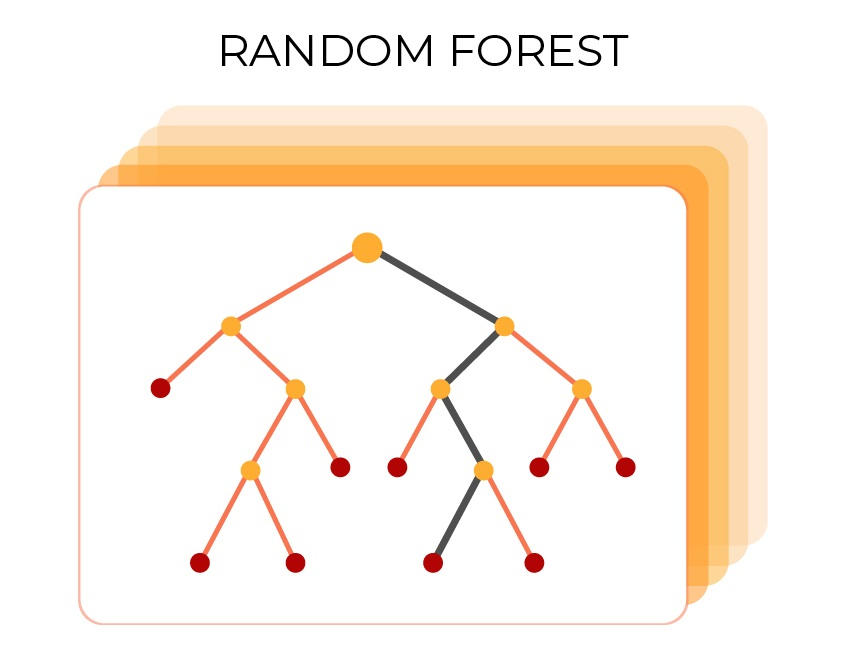

El siguiente dataset cuenta con la información de una cadena de hospitales que tiene como objetivo crear la próxima generación de atención médica para sus pacientes.

En este caso, su cliente quiere estudiar alrededor de una de las enfermedades críticas "Stroke". 

El accidente cerebrovascular es una enfermedad que afecta las arterias que conducen hacia y dentro del cerebro. Un accidente cerebrovascular ocurre cuando un vaso sanguíneo que transporta oxígeno y nutrientes al cerebro está bloqueado por un coágulo o estalla (o se rompe). Cuando eso sucede, parte del cerebro no puede obtener la sangre (y el oxígeno) que necesita, por lo que mueren las células cerebrales.


El Cliente quiere que usted ***prediga la probabilidad de que ocurra un accidente cerebrovascular a sus pacientes***. Esto ayudará a los médicos a tomar medidas de salud proactivas para estos pacientes.




Importando librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
from google.colab import drive
drive.mount('gdrive') 

Mounted at gdrive


Cargando el dataset

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/CLASES DATOS/DATASETS/Health Analytics/HealthAnalytics.csv')

In [5]:
print('PRIMERAS FILAS')
print('\n')
df.head()

PRIMERAS FILAS




,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [6]:
print('ULTIMAS FILAS')
print('\n')
df.tail()

ULTIMAS FILAS




,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


Revisamos la estructura de los datos

In [7]:
df.shape

(43400, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


A continuacion, la explicacion de cada variable

* id : identificador de paciente

* gender : genero del paciente

* age : edad del paciente

* hypertension : tenencia de hipertension

* heart_disease :  tenencia de enfermedad del corazon

* ever_married : status de casado

* work_type :  tipo de ocupacion del paciente

* Residence_type : tipo de area de residencia

* avg_glucose_level: nivel promedio de glucosa

* bmi :  indice de masa corporal

* smoking_status : status de fumador

* stroke : (0 - no stroke) (1 - si stroke)

Notamos que hay valores null, veamos la proporcion.

In [9]:
df.isnull().sum()/df.shape[0]*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

#Exploracion de features

Iniciemos la exploracion de variables trabajando los valores nulls

VARIABLE : BMI

In [10]:
df.bmi.describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64

No hay muchos datos perdidos de bmi en comparacion al total, podemos usar el criterio experto y hacer un fill-in con la media de la variable

In [11]:
df['bmi'].replace(np.nan , np.mean(df['bmi']) , inplace = True)

Vamos con la siguiente variable : smoking_status. Es categorica, asi que reemplazaremos los valores perdidos con la moda.

In [12]:
#ubicando la moda

df['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [13]:
#colocando la moda en los valores null
df['smoking_status'].replace(np.nan , 'never smoked' , inplace = True)

In [14]:
df['smoking_status'].value_counts()

never smoked       29345
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [15]:
#vemos que no hay mas nulls
df.isnull().sum()/df.shape[0]*100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

Separemos nuestras variables en categoricas y numericas

In [16]:
df_categoricas = [x for x in df.columns if df[x].dtypes == 'object']
df_categoricas

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [17]:
df_numericas = [x for x in df.columns if df[x].dtypes != 'object']
df_numericas

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [18]:
df_numericas.remove('id')
df_numericas

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [19]:
#Revisemos que categorias tenemos en cada variable

for x in df_categoricas:
    print(x)
    print(df[x].unique())
    print('\n')

gender
['Male' 'Female' 'Other']


ever_married
['No' 'Yes']


work_type
['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']


Residence_type
['Rural' 'Urban']


smoking_status
['never smoked' 'formerly smoked' 'smokes']




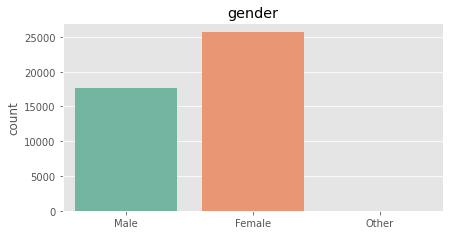

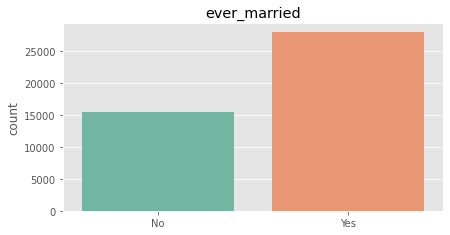

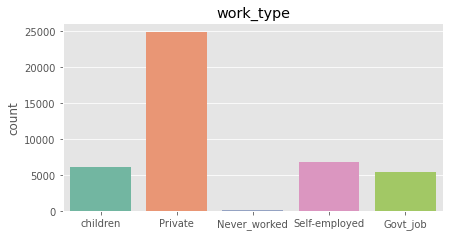

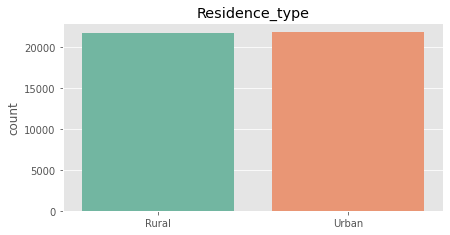

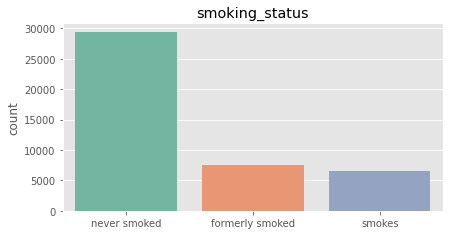

In [20]:
# Analisis visual 

for x in df_categoricas:
    plt.figure(figsize = (15,20))
    plt.subplot(len(df_categoricas),2,2)
    sns.countplot(x = x, palette = 'Set2', data = df)
    plt.title(x)
    plt.xlabel('')
    plt.show()

In [21]:
# del grafico de genero observamos que una seccion es categorizada como other
# al ser una cantidad muy pequeña, la renombraremos como female (la moda)
df['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [22]:
df.loc[df['gender'] == 'Other' ,'gender' ]  = 'Female'

In [23]:
df['gender'].value_counts()

Female    25676
Male      17724
Name: gender, dtype: int64

In [24]:
# lo mismo para la situacion'never_worked' in 'work_type'
# veamoslo en porcentaje
df['work_type'].value_counts(normalize = True)*100 

Private          57.221198
Self-employed    15.652074
children         14.184332
Govt_job         12.534562
Never_worked      0.407834
Name: work_type, dtype: float64

In [25]:
# never_worked es 0.4% del total de datos de la variable, lo imputaremos como parte del grupo 'private'

df.loc[df['work_type'] == 'Never_worked' ,'work_type' ]  = 'Private'
df['work_type'].value_counts()

Private          25011
Self-employed     6793
children          6156
Govt_job          5440
Name: work_type, dtype: int64

In [26]:
#sacamos la columna de id , pues  no es relevante para el trabajo que se hara
df = df.drop('id' , axis = 1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Private,Rural,161.28,19.1,never smoked,0


<Axes: >

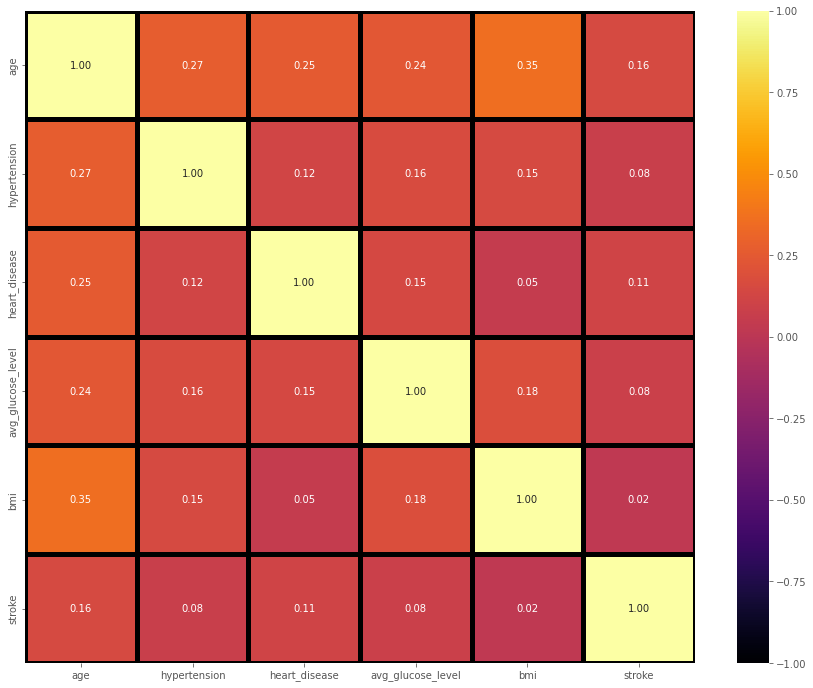

In [27]:
# Veamos las correlaciones que tenemos para tener una guia

corr = df.corr()

fig, ax = plt.subplots(figsize=(15,12))         

sns.heatmap(corr,
            vmin = -1,        #valor minimo de la escala
            vmax = 1,         #valor max de la escala
            annot = True,     #valores en las casillas
            fmt=".2f",        #formato de los annot
            linewidths=.5,  
            cmap = sns.color_palette("inferno", as_cmap=True) ,     
            ax=ax, #ejes
            linewidth = 5,   
            linecolor= 'black',
            square = False)

Una de las cosas que mas resaltan de las variables es 'heart_disease', es bastante claro que las personas que tengan antecedentes de alguna enfermedad al corazon tienen una salud mas delicada que las demás, asi que revisaremos algunas distribuciones y relaciones de esta varible con las demás.

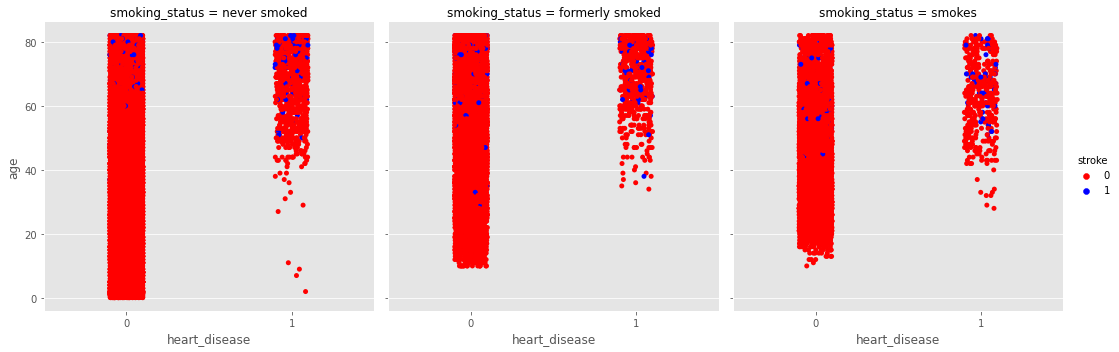

In [28]:
sns.catplot(data = df,
            x = 'heart_disease',
            y = 'age',
            hue = 'stroke',
            col = 'smoking_status',
            kind = 'strip',
            palette = sns.color_palette(['red','blue'])
            )
# heart_disease = 0 ...NO
# heart_disease = 0 ...YES

Este grafico arroja un poco de luz sobre el asunto, podemos obtener la siguiente informacion:

* Entre las personas que no han tenido alguna enfermedad al corazón, podemos ver que la edad juega un papel relevante, pues los adultos mayores son los que tuvieron un stroke (cuando nunca han fumado) , y que el rango de edad se incrementa cuando la persona tuvo un pasado de fumador, pues vemos afectados de poco mas de 30 años en adelante. Nos lleva a pensar que el vicio de fumar tiene la suficiente relevancia para hacer que un adulto joven pueda volverse propenso a un stroke.

* Los fumadores sin enfermedad cardiaca tambien poseen mas vulnerabilidad a un stroke, notando que va desde poco mas de 40 años en adelante, concentrandose a partir de los 60 años, sin embargo esto no es tan fuerte como en los 'ex-fumadores'.

* En todos los grupos, las personas con alguna enfermedad cardiaca son en su mayoria personas de 40 años a más, y de este grupo, fumadores o no, vemos como se concentra la cantidad de personas con stroke a partir de los 50 años en adelante de manera semejante en los 3 grupos.

Veamos el mismo grafico, pero ahora segmentado por el tipo de trabajo.

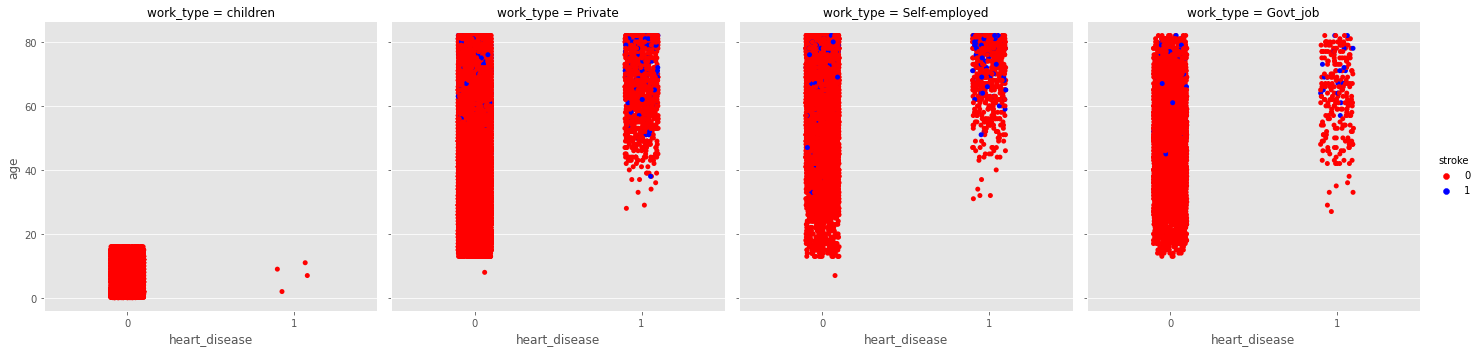

In [29]:
sns.catplot(data = df,
            x = 'heart_disease',
            y = 'age',
            hue = 'stroke',
            col = 'work_type',
            kind = 'strip',
            palette = sns.color_palette(['red','blue'])
            )
# heart_disease = 0 ...NO
# heart_disease = 0 ...YES

Hagamos una pregunta
¿Cual es la edad,bmi, y nivel de glucosa, de las personas, en los casos donde son y no son afectadas por un stroke?

In [30]:
#Con la siguiente linea podemos responder ello, y aun un poco mas porque lo segmentaremos
#por tipo de trabajo y si tiene o no enfermedad cardiaca

df.groupby(['work_type','heart_disease','stroke']).agg('mean')

age  hypertension  \
work_type     heart_disease stroke                            
Govt_job      0             0       48.182067      0.101387   
                            1       64.500000      0.242857   
              1             0       62.870690      0.224138   
                            1       70.842105      0.263158   
Private       0             0       43.453741      0.085842   
                            1       65.776471      0.211765   
              1             0       66.180952      0.235238   
                            1       70.900990      0.316832   
Self-employed 0             0       57.657244      0.144372   
                            1       70.943299      0.304124   
              1             0       70.560935      0.273790   
                            1       73.543860      0.263158   
children      0             0        6.698582      0.000325   
                            1        7.660000      0.000000   
              1             0        7.250000      0.000000   

                                    avg_glucose_level        bmi  
work_type     heart_disease stroke                                
Govt_job      0             0              105.447984  30.515177  
                            1              135.582000  29.987863  
              1             0              131.611810  30.191104  
                            1              148.997895  30.026846  
Private       0             0              102.928785  29.860821  
                            1              126.176500  29.965081  
              1             0              133.263505  30.878543  
                            1              150.744752  29.635551  
Self-employed 0             0              110.476111  30.089665  
                            1              117.244948  28.980702  
              1             0              128.310718  30.115037  
                            1              142.850526  29.423956  
children      0             0               92.378150  20.054013  
                            1               64.150000  29.752519  
              1             0              102.742500  23.575000

La hipertension tambien es un factor de riesgo, veamos que sucede ahi.

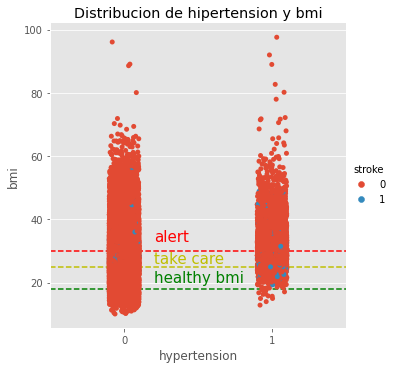

In [31]:
sns.catplot(data = df,
            x = 'hypertension',
            y = 'bmi',
            hue = 'stroke'
   #         col = 'Residence_type'
       #    palette = sns.color_palette(['red','blue']
            )

plt.axhline(y=18, color='g', linestyle='--')
plt.text(0.2,20,'healthy bmi', color = 'green', fontsize=15)

plt.axhline(y=25, color='y', linestyle='--')
plt.text(0.2,26,'take care', color = 'y', fontsize=15)

plt.axhline(y=30, color='r', linestyle='--')
plt.text(0.2,33,'alert', color = 'r', fontsize=15)
plt.title('Distribucion de hipertension y bmi')
plt.show()

# bmi < 25 ...saludable
# 30 > bmi > 25 ... peso elevado (cuidado)
# bmi > 30 ...(obesidad , alerta)

* Aun dentro de un rango saludable de bmi, existen personas que tuvieron un stroke, pero solo cuando estas padecian de hipertension. Aquellas personas que no tuvieron hipertension sufrieron un stroke porque tenian un bmi fuera de lo saludable.

* Los afectados por hipertension, aun con un bmi saludable, tuvieron un stroke, dandonos a entender que la hipertension es un factor de mayor peso *

<Axes: xlabel='age', ylabel='bmi'>

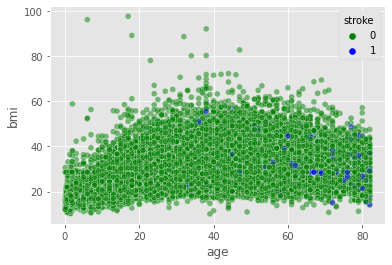

In [32]:
sns.scatterplot(data = df,
                x = df['age'],
                y = df['bmi'],
                hue = df['stroke'],
                alpha = .5,
                palette = sns.color_palette(['green','blue'])
                )
            

Esta grafica nos muestra como las personas afectadas por un stroke empiezan a aparecer a partir de los 30 años aproximadamente y que el bmi es de todo rango, desde un lugar saludable como bmi = 18 , hasta un lugar peligroso como bmi = 50.

Consideremos la medida de glucosa en la sangre

Los valores de azúcar en la sangre de 

* 140 mg/dl o menores se consideran normales

*  140 - 199 mg/dl indican que tiene prediabetes 

* 200 mg/dl o mayores indican que tiene diabetes.

Por lo tanto...

¿Cuales son los valores promedio de edad y bmi de personas mayores a 30 años que presentan prediabetes?

In [33]:
df.query('age > 30')\
        [(df['avg_glucose_level'] > 140) & ((df['avg_glucose_level'] < 199))]\
        .groupby(['gender','stroke']).agg('mean')


<ipython-input-33-03d8730493ba>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('age > 30')\


age  hypertension  heart_disease  avg_glucose_level  \
gender stroke                                                              
Female 0       57.566563      0.202786       0.081269         171.754915   
       1       67.466667      0.222222       0.177778         177.812222   
Male   0       58.458458      0.206206       0.142142         172.899740   
       1       65.078431      0.235294       0.352941         176.554118   

                     bmi  
gender stroke             
Female 0       32.334131  
       1       29.325676  
Male   0       31.506770  
       1       32.124616

¿Y los que presentan diabetes?

In [34]:
df.query('age > 30')\
        [(df['avg_glucose_level'] >= 200)]\
        .groupby(['gender','stroke']).agg('mean')


<ipython-input-34-a3538bbcbe90>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('age > 30')\


age  hypertension  heart_disease  avg_glucose_level  \
gender stroke                                                              
Female 0       61.633355      0.254798       0.115156         221.558233   
       1       69.553191      0.276596       0.297872         219.293936   
Male   0       61.790869      0.253314       0.179676         221.811046   
       1       69.824324      0.337838       0.378378         224.980135   

                     bmi  
gender stroke             
Female 0       34.578964  
       1       32.073091  
Male   0       32.866219  
       1       30.944128

¿Influirá en algo el estado civil y el tipo de residencia? Veamoslo

In [35]:
print('Porcentaje de poblacion segun estado civil \n')

df.groupby(['ever_married','stroke'])['stroke'].agg('count')/df.shape[0]*100


Porcentaje de poblacion segun estado civil 



ever_married  stroke
No            0         35.442396
              1          0.184332
Yes           0         62.753456
              1          1.619816
Name: stroke, dtype: float64

La cantidad de casados y solteros en comparacion a si poseen o no stroke es realmente abrumadora.

Parece ser que los casados son mas propensos a padecer esta enfermedad.

<Axes: xlabel='ever_married', ylabel='Count'>

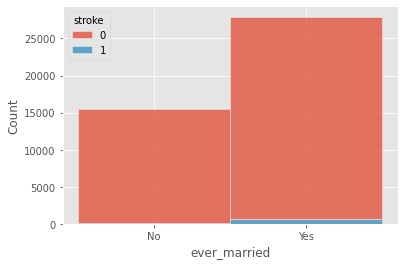

In [36]:
sns.histplot(data = df,
             x = df.ever_married, 
             multiple = 'stack',
             stat = 'count',
             hue = df.stroke)

<Axes: xlabel='ever_married', ylabel='Count'>

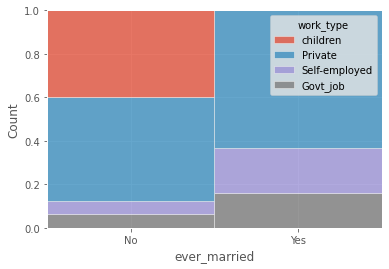

In [37]:
sns.histplot( 
             x = df.ever_married,
             hue = df.work_type,
             multiple = 'fill')

<Axes: xlabel='work_type', ylabel='Count'>

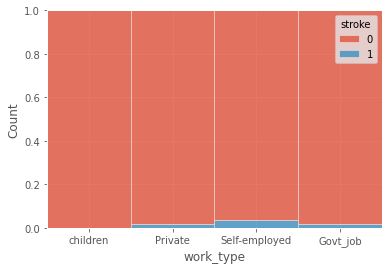

In [38]:
sns.histplot( 
             x = df.work_type,
             hue = df.stroke,
             multiple = 'fill')

<Axes: xlabel='Residence_type', ylabel='Count'>

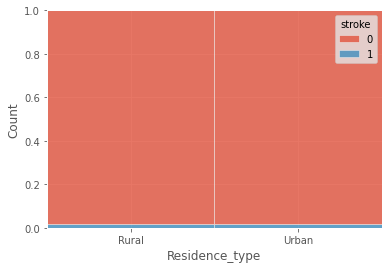

In [39]:
sns.histplot( 
             x = df.Residence_type,
             hue = df.stroke,
             multiple = 'fill')

In [40]:
print('Porcentaje de poblacion segun tipo de residencia y segun stroke \n')

df.groupby(['Residence_type','stroke'])['stroke'].agg('count')/df.shape[0]*100


Porcentaje de poblacion segun tipo de residencia y segun stroke 



Residence_type  stroke
Rural           0         48.986175
                1          0.884793
Urban           0         49.209677
                1          0.919355
Name: stroke, dtype: float64

Preprocesamos las variables categoricas antes de entrenar el algoritmo, pues las maquinas no entienden strings, ellas comprenden numeros.

In [41]:
data_categorica = df[df_categoricas]

data_categorica.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,never smoked
1,Male,Yes,Private,Urban,never smoked
2,Female,No,Private,Urban,never smoked
3,Female,Yes,Private,Rural,formerly smoked
4,Male,No,Private,Rural,never smoked


In [42]:

from sklearn.preprocessing import LabelEncoder   

for c in df_categoricas:
    
    le = LabelEncoder()
    le.fit(data_categorica[str(c)])
    data_categorica[str(c)] = le.transform(data_categorica[str(c)]) 

<ipython-input-42-cd9b1f3147f9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorica[str(c)] = le.transform(data_categorica[str(c)])
<ipython-input-42-cd9b1f3147f9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorica[str(c)] = le.transform(data_categorica[str(c)])
<ipython-input-42-cd9b1f3147f9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [43]:
data_categorica.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,0,3,0,1
1,1,1,1,1,1
2,0,0,1,1,1
3,0,1,1,0,0
4,1,0,1,0,1


# Ingenieria de Variables

In [44]:
# Ingenieria de Variables con Features polinómicos

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,  
                          interaction_only=False,
                          include_bias= False) 
to_cross = ['bmi', 'avg_glucose_level', 'age']           

variables_cross = poly.fit_transform( df[to_cross].values )         

variables_cruzadas = pd.DataFrame(variables_cross)

#un vistazo a las nuevas variables
# Logica: 1,2,3,   1^2,1*2,1*3,2^2,2*3,3^2

# 1 : bmi
# 2 : avg_glucose_level
# 3 : age

variables_cruzadas.head()

,0,1,2,3,4,5,6,7,8
0,18.0,95.12,3.0,324.00,1712.160,54.0,9047.8144,285.36,9.0
1,39.2,87.96,58.0,1536.64,3448.032,2273.6,7736.9616,5101.68,3364.0
2,17.6,110.89,8.0,309.76,1951.664,140.8,12296.5921,887.12,64.0
3,35.9,69.04,70.0,1288.81,2478.536,2513.0,4766.5216,4832.80,4900.0
4,19.1,161.28,14.0,364.81,3080.448,267.4,26011.2384,2257.92,196.0


In [45]:
variables_cruzadas = pd.DataFrame(variables_cruzadas.iloc[:,3:9].to_numpy(),
                             columns=['bmi_^2','bmi_avg_glucose_level',
                                      'bmi_age','avg_glucose_level_^2',
                                      'avg_glucose_level_age','age_^2'])

variables_cruzadas.head()

,bmi_^2,bmi_avg_glucose_level,bmi_age,avg_glucose_level_^2,avg_glucose_level_age,age_^2
0,324.00,1712.160,54.0,9047.8144,285.36,9.0
1,1536.64,3448.032,2273.6,7736.9616,5101.68,3364.0
2,309.76,1951.664,140.8,12296.5921,887.12,64.0
3,1288.81,2478.536,2513.0,4766.5216,4832.80,4900.0
4,364.81,3080.448,267.4,26011.2384,2257.92,196.0


In [46]:
variables_cruzadas.describe()

,bmi_^2,bmi_avg_glucose_level,bmi_age,avg_glucose_level_^2,avg_glucose_level_age,age_^2
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,876.586278,3049.386164,1268.229722,12775.225292,4641.739099,2289.473466
std,501.719271,1743.501478,762.120638,12316.885772,3706.675844,1917.035263
min,102.010000,638.604000,0.968000,3025.000000,5.404000,0.006400
25%,547.560000,1972.538500,642.500000,6012.451600,2094.442500,576.000000
50%,789.610000,2538.245000,1281.000000,8386.896400,3858.035000,1936.000000
75%,1062.760000,3419.940000,1830.400000,12559.684900,5925.945000,3600.000000
max,9525.760000,19721.469000,6942.000000,84710.102500,23284.000000,6724.000000


In [47]:
df_2 = pd.concat([df,variables_cruzadas],axis=1)
df_2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_^2,bmi_avg_glucose_level,bmi_age,avg_glucose_level_^2,avg_glucose_level_age,age_^2
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,324.00,1712.160,54.0,9047.8144,285.36,9.0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1536.64,3448.032,2273.6,7736.9616,5101.68,3364.0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,309.76,1951.664,140.8,12296.5921,887.12,64.0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,1288.81,2478.536,2513.0,4766.5216,4832.80,4900.0
4,Male,14.0,0,0,No,Private,Rural,161.28,19.1,never smoked,0,364.81,3080.448,267.4,26011.2384,2257.92,196.0


Unamos todo en un solo dataframe

In [48]:
data_numerica = df[df_numericas]
data_numerica.drop('stroke' , axis = 1 , inplace = True)


<ipython-input-48-965c833343c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numerica.drop('stroke' , axis = 1 , inplace = True)


In [49]:
data = pd.concat([data_categorica , data_numerica ,variables_cruzadas , df['stroke'] ],
                 axis = 1)

In [50]:
data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,bmi_^2,bmi_avg_glucose_level,bmi_age,avg_glucose_level_^2,avg_glucose_level_age,age_^2,stroke
0,1,0,3,0,1,3.0,0,0,95.12,18.0,324.00,1712.160,54.0,9047.8144,285.36,9.0,0
1,1,1,1,1,1,58.0,1,0,87.96,39.2,1536.64,3448.032,2273.6,7736.9616,5101.68,3364.0,0
2,0,0,1,1,1,8.0,0,0,110.89,17.6,309.76,1951.664,140.8,12296.5921,887.12,64.0,0
3,0,1,1,0,0,70.0,0,0,69.04,35.9,1288.81,2478.536,2513.0,4766.5216,4832.80,4900.0,0
4,1,0,1,0,1,14.0,0,0,161.28,19.1,364.81,3080.448,267.4,26011.2384,2257.92,196.0,0


Antes de continuar al entrenamiento del modelo, hay que preparar los datos, y para ello empecemos mirando que el dataset esta fuertemente desbalanceado.

Decimos que un dataset es imbalanceado cuando una de las clases es excesivamente mayor que la otra en terminos de cantidad de elementos.

Debido a que nuestro modelo busca aprender patrones entre los datos, si casi todos los datos que alcanza a aprender son de una misma clase, entonces no podra extraer con efectividad los patrones para detectar la otra clase (que es justamente lo que queremos).

Para solucionar este problema vamos a balancear los datos; mas precisamente, tomaremos a la clase mayoritaria, y se extraera un subconjunto de esta, de tal forma que este subconjunto tenga misma cantidad de elementos que la clase minoritaria, y asi el modelo pueda aprender patrones de mejor forma.

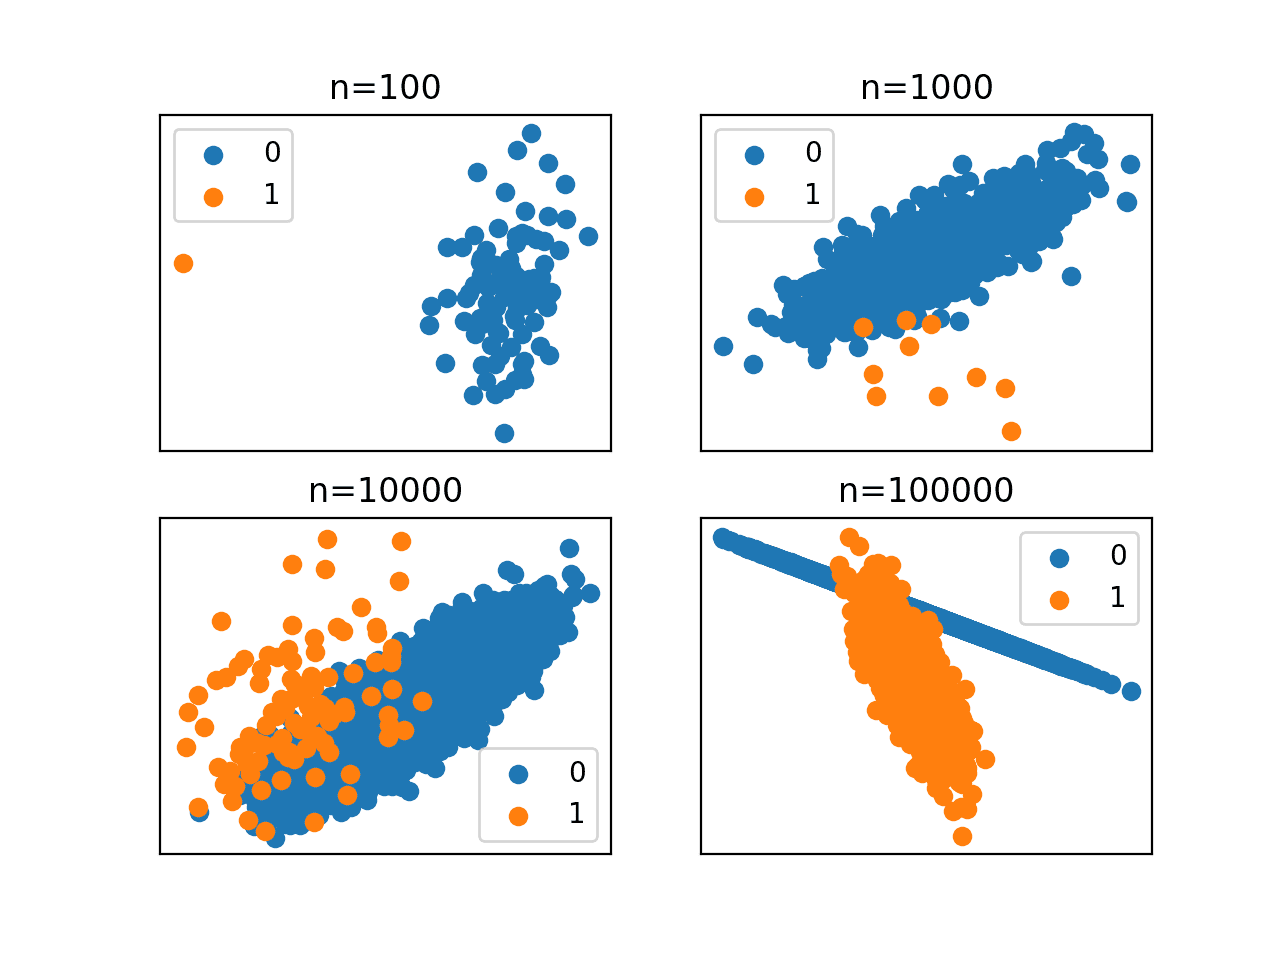

In [51]:
# Vemos el desbalance actual

df['stroke'].value_counts(normalize = True)*100

0    98.195853
1     1.804147
Name: stroke, dtype: float64

Procederemos a hacer un train_test_split, y luego solo balancearemos los datos del train, de esa forma, podremos entrenar el modelo y este aprendera adecuadamente lo que queremos. Luego podremos hacer el test en el conjunto restante , que aunque este desbalanceado no afectara el resultado.

In [52]:
X = data.drop('stroke', axis = 1) 
y = data['stroke']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y , random_state=22)

In [54]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

print('Original dataset shape %s' % Counter( y_train ))

Original dataset shape Counter({0: 29832, 1: 548})


In [55]:
rus = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_resampled))


Resampled dataset shape Counter({0: 548, 1: 548})


In [56]:
X_train_resampled.shape , y_train_resampled.shape

((1096, 16), (1096,))

Con el train resampleado, procedemos a entrenar el modelo.

Un Arbol de decision es un ordenamiento donde con base a decisiones(valga la redundancia) vamos partiendo el conjunto de datos en otros mas pequeños, y asi sucesivamente hasta obtener un subconjunto que podamos etiquetar de cierta forma. 

Un Random Forest, es hacer el mismo proceso, solo que en lugar de crear 1 arbol, se desarrollan muchos (100, 200, 500, etc), y luego se toman una decision basada en los resultados.

El Random Forest, a pesar de tener mas gasto de maquina, suele ser mas robusto.

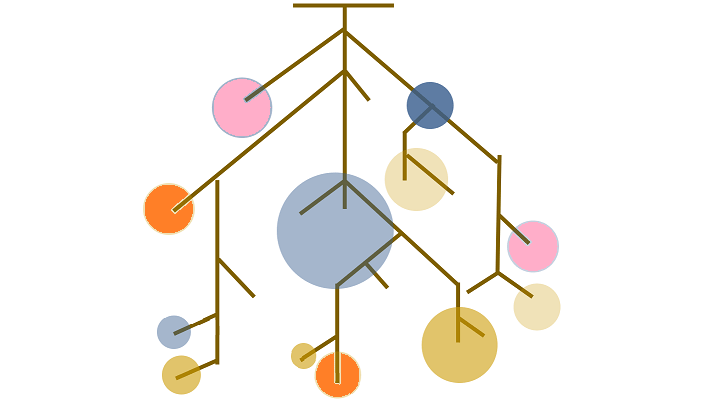

In [57]:
from sklearn.ensemble import RandomForestClassifier  
forest = RandomForestClassifier()                    
forest.fit(X_train_resampled,y_train_resampled)                                                

RandomForestClassifier()

In [58]:
# predecimos

y_pred = forest.predict(X_test)

In [59]:
#Scoreamos

from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy del modelo sobre la data de test: ' , accuracy_score(y_test , y_pred)*100 )


Accuracy del modelo sobre la data de test:  71.42857142857143


In [60]:
cm = confusion_matrix(y_test, y_pred)

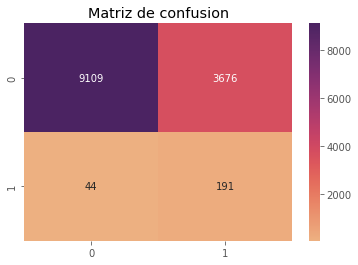

In [61]:
cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm)
                        

g = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='flare') 
g.set(title = 'Matriz de confusion')
plt.show()

Atencion:

Esta matriz de confusion podria lucir mal, pero hay que recordar lo siguiente:

* El entrenamiento del modelo se realizo con data balanceada, pero no la prediccion(que esta desbalanceada), asi que es normal que haya un exceso de labels de una clase y muy pocos de la otra.

* En estos casos donde la prediccion se realizo sobre data imbalanceada, el acuraccy no es tan eficaz para poder ver el performance del algoritmo, asi que se recomienda usar los Ratios de prediccion.

In [62]:
# True Positive Rate 
# Buscamos que este ratio sea lo mas cercano a 100%  
ratio = 187/(187+48)
ratio*100

79.57446808510639

In [63]:
# False Positive Rate
# Buscamos que este ratio sea lo mas cercano a 0%  
ratio = 3691/(3691+9094)
ratio*100

28.869769260852564

Por ahora el algoritmo tiene un desempeño normal, sin embargo hay que recordar que este resultado se ha obtenido haciendo un entrenamiento 'por default'. Ahora vamos a la etapa de Optimizacion de hiperparametros.

In [64]:
from pprint import pprint
print('Parametros del random forest de nuestro actual modelo:\n ')
pprint(forest.get_params())

Parametros del random forest de nuestro actual modelo:
 
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [65]:
from sklearn.model_selection import RandomizedSearchCV

# Numero de arboles
n_trees = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_trees,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

forest_random = RandomizedSearchCV(estimator = forest,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   cv = 5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs = -1)

# Fit the random search model
forest_random.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
print('Best params: ')
pprint(forest_random.best_params_)
print('\n')
print('Best score: ',forest_random.best_score_)

Best params: 
{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 600}


Best score:  0.7992860107928601


In [ ]:
# Guardamos los resultados en un csv

df_results_random = pd.DataFrame(forest_random.cv_results_)
 
df_results_random.to_csv('random_forest_results.csv')

REVISEMOS EL CSV DE LOS RESULTADOS DEL RANDOM SEARCH

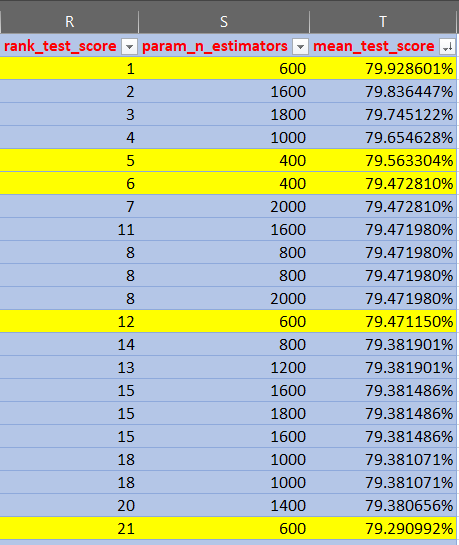

Hacemos esta revision para poder ver un parametro que suele ser decisivo cuando se entrena un random forest : 'el numero de arboles'.

Vemos que el mejor modelo se logra con 600 trees, y que el segundo mejor se consigue con 1600 (una enorme diferencia); sin embargo vemos que en 5to y 6to lugar hay un entrenamiento de 400 trees y que el score solo varía en 0.4% . 

Podriamos evaluar si es conveniente para nosotros ese trade entre score y tiempo de entrenamiento. En ciertas situaciones ese 0.4% puede ser decisivo, pero en nuestro caso, seguiremos usando los parametros encontrados con el random search; siempre es bueno ver un poco los demas lugares y ver que otros resultados se obtuvieron.

In [66]:
# Parametros a usar

params = {'n_estimators': 600,
          'min_samples_split': 2,
          'min_samples_leaf': 4,
          'max_features': 'auto',
          'max_depth': 40,
          'bootstrap': True}


In [ ]:
# Ya tenemos una idea de masomenos donde ubicar los mejores parametros gracias al random search
# Si deseamos podemos usarl el grid search cv para ubicar con mayor detalle algun punto
# dentro de la posicion que encontramos previamente con el random search, para asi tratar de mejorar
# un poco el scoring obtenido

# Esto es opcional, ya que estamos satisfechos con el resultado obtenido.
# Por lo tanto se dejara el codigo y si se desea hacer, lo ejecutan.
# Tener en cuenta el tiempo de entrenamiento, que puede llegar a ser elevado.


# from sklearn.model_selection import GridSearchCV

# estimadores = {
#                 'n_estimators': [int(x) for x in np.linspace(start = 400, stop = 600, num = 40)],
#                 'min_samples_split': [2, 5],
#                 'min_samples_leaf': [2 , 7 , 10],
#                 'max_features': ['auto', 'sqrt'],
#                 'max_depth': [50,60,70]
#               }

# grid = GridSearchCV( forest , estimadores, refit=True,verbose = 3, cv = 3)
# grid.fit(X_train_resampled, y_train_resampled) 

# best_params = grid.best_params_
# print('Best Params: \n')
# pprint(best_params)



In [68]:

forest_optimized = RandomForestClassifier(n_estimators =  600,
                                min_samples_split = 2,
                                min_samples_leaf = 4,
                                max_features = 'auto',
                                max_depth = 40,
                                bootstrap = True,
                                random_state = 4)

forest_optimized.fit(X_train_resampled , y_train_resampled)

y_pred_2 = forest_optimized.predict(X_test)

print('Accuracy del modelo optimizado: ',accuracy_score(y_test,y_pred_2)*100)
print('Accuracy del modelo no optimizado: ',accuracy_score(y_test,y_pred)*100)
print('Mejora del accuracy: ',accuracy_score(y_test,y_pred_2)*100-accuracy_score(y_test,y_pred)*100)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy del modelo optimizado:  72.00460829493088
Accuracy del modelo no optimizado:  71.42857142857143
Mejora del accuracy:  0.5760368663594448


Despues del proceso de optimizacion, hemos conseguido un aumento de 0.57% .
Podriamos mejorar este resultado haciendo la etapa del gridsearchcv y buscando unos parametros mas precisos, pero un 72% de accuracy es decente para un modelo de clasificacion. Aun podriamos mejorar mas este modelo haciendo un poco de feature enginnering extra, seleccion de variables y ajustando algunos valores, sin embargo se obtuvo un buen resultado.

In [69]:
# Para terminar con el notebook , se nos pidio obtener la probabilidad de tener o no tener un stroke
# en el siguiente dataframe resumiremos esa informacion

#Creando un dataframe de las predicciones

df_probab = pd.DataFrame(data = forest_optimized.predict_proba(X) , columns = ['prob_no_stroke','prob_yes_stroke'])


In [70]:
#Creamos una lista donde almacenaremos los resultados

list_results = []

# Ciclo for para recorrer cada fila, comparar las probabilidades y determinar si posee o no un stroke la persona.
# Por default pondremos que la probabilidad mayor sera la que determine el resultado
# Podriamos crear un umbral para determinar esto tbn pero no optaremos esa via.

for x in np.arange(len(df_probab)):
    if df_probab.prob_no_stroke[x] > df_probab.prob_yes_stroke[x]:
        
        list_results.append('NO STROKE')

    else:
        list_results.append('STROKE')


In [71]:
# Añadimos la lista de resultados como columna del dataframe de predicciones

df_probab['results'] = pd.DataFrame(data = list_results)
df_probab.head(15)

,prob_no_stroke,prob_yes_stroke,results
0,0.999375,0.000625,NO STROKE
1,0.474912,0.525088,STROKE
2,1.000000,0.000000,NO STROKE
3,0.516238,0.483762,NO STROKE
4,0.990712,0.009288,NO STROKE
5,0.492026,0.507974,STROKE
6,0.783875,0.216125,NO STROKE
7,0.083770,0.916230,STROKE
8,0.900273,0.099727,NO STROKE
9,0.137238,0.862762,STROKE


PARA TERMINAR, PODEMOS UNIR ESTOS RESULTADOS AL DATAFRAME DE DATOS GENERALES Y ASI TENER UN CUADRO COMPLETO DE QUE PACIENTES SON O NO SON PROPENSOS A TENER UN STROKE.

In [72]:
data_final = pd.concat( [data , df_probab] , axis = 1)
data_final.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,bmi_^2,bmi_avg_glucose_level,bmi_age,avg_glucose_level_^2,avg_glucose_level_age,age_^2,stroke,prob_no_stroke,prob_yes_stroke,results
0,1,0,3,0,1,3.0,0,0,95.12,18.0,324.00,1712.160,54.0,9047.8144,285.36,9.0,0,0.999375,0.000625,NO STROKE
1,1,1,1,1,1,58.0,1,0,87.96,39.2,1536.64,3448.032,2273.6,7736.9616,5101.68,3364.0,0,0.474912,0.525088,STROKE
2,0,0,1,1,1,8.0,0,0,110.89,17.6,309.76,1951.664,140.8,12296.5921,887.12,64.0,0,1.000000,0.000000,NO STROKE
3,0,1,1,0,0,70.0,0,0,69.04,35.9,1288.81,2478.536,2513.0,4766.5216,4832.80,4900.0,0,0.516238,0.483762,NO STROKE
4,1,0,1,0,1,14.0,0,0,161.28,19.1,364.81,3080.448,267.4,26011.2384,2257.92,196.0,0,0.990712,0.009288,NO STROKE


Gracias por tu tiempo.